# Pascal's Worldcup Challenge
 The aim of this exercise to to answer the following questions:
* How many matches were played each world cup year from 1930.
* Total goals scored for each tournament year.
* All teams who have reached finals and how many times.
* All teams who have reached semis and how many times.
* How many goals and average goals scored in all semi-finals.
* How many goals and average goals scored in all quarter-finals.
* How many goals and average number scored in all finals
* How many matches were played outside quarter-finals and above.
* Two new columns for each of the outcome of every match stating

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
matches =  pd.read_csv('world_cup_results.csv')

In [3]:
print('The dataset has {} number of observations and {} number of fields'.format(matches.shape[0], matches.shape[1]))

The dataset has 852 number of observations and 11 number of fields


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 11 columns):
Year           852 non-null int64
Date           852 non-null object
Time           852 non-null object
Round          852 non-null object
Stadium        852 non-null object
City           852 non-null object
HomeTeam       852 non-null object
HomeGoals      852 non-null int64
AwayGoals      852 non-null int64
AwayTeam       852 non-null object
Observation    852 non-null object
dtypes: int64(3), object(8)
memory usage: 73.3+ KB


In [5]:
matches['Date'] = pd.to_datetime(matches['Date'])
matches.dtypes

Year                    int64
Date           datetime64[ns]
Time                   object
Round                  object
Stadium                object
City                   object
HomeTeam               object
HomeGoals               int64
AwayGoals               int64
AwayTeam               object
Observation            object
dtype: object

### How many matches were played each world cup year from 1930

Text(0, 0.5, 'Year')

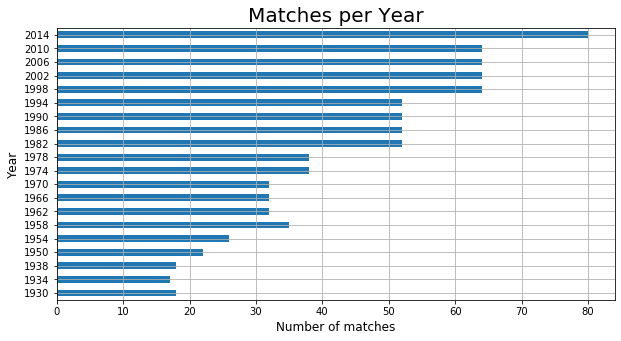

In [6]:
matches_per_year = matches.groupby('Year')['Year'].count()
matches_per_year.plot(kind = 'barh', figsize = (10,5), grid = True)
plt.title('Matches per Year', fontsize = 20)
plt.xlabel('Number of matches', fontsize = 12)
plt.ylabel('Year', fontsize = 12)

## Total goals scored for each tournament year

Text(0, 0.5, 'Number of Goals')

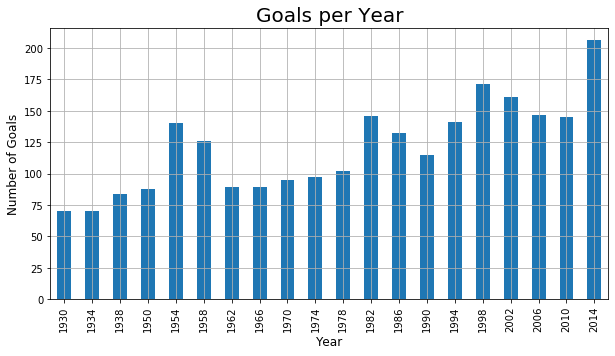

In [7]:
matches['goals'] = matches['HomeGoals'] + matches['AwayGoals']
goals_per_year = matches.groupby('Year')['goals'].sum()
goals_per_year.plot(kind = 'bar', figsize = (10,5), grid = True)
plt.title('Goals per Year', fontsize = 20)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Goals', fontsize = 12)

## All teams who have reached finals and how many times

In [8]:
matches['Round'].value_counts()

Round of 16                 72
Quarter-finals              66
Group 1                     62
Group A                     60
Group B                     60
Group 2                     59
Group 3                     56
Group 4                     55
Group E                     48
Group D                     48
Group C                     48
Group F                     48
Semi-finals                 36
Group G                     30
Group H                     30
Final                       20
Match for third place       15
Group 6                     12
First round                  9
Preliminary round            8
Group 5                      6
Play-off for third place     2
Third place                  2
Name: Round, dtype: int64

Text(0.5, 0, 'Number of Appearance(s)')

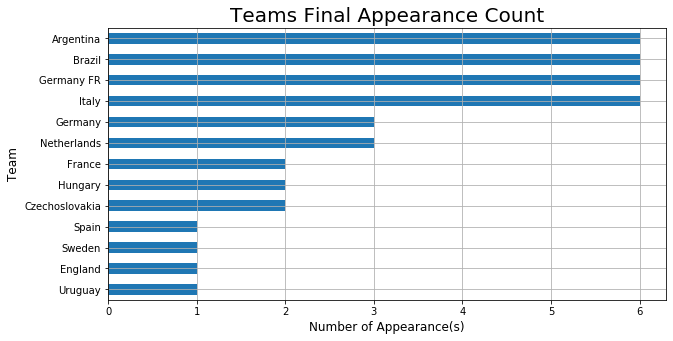

In [9]:
finals = matches[matches['Round'] == 'Final']
teams_f = []
for row in finals['HomeTeam']:
    teams_f.append(row)
for row in finals['AwayTeam']:
    teams_f.append(row)
    
teams_cnt = {}
for team in teams_f:
    if team in teams_cnt:
        teams_cnt[team] += 1
    else:
        teams_cnt[team] = 1
final_teams_cnt = []
for team in teams_cnt:
    final_teams_cnt.append([team,teams_cnt[team]])
finals_team = pd.DataFrame(final_teams_cnt)
finals_team.columns = ['Team','Appearance']
finals_team.set_index('Team', inplace = True)

finals_team.sort_values(by = 'Appearance').plot(kind = 'barh', figsize = (10,5), grid = True, legend = False)
plt.title('Teams Final Appearance Count', fontsize = 20)
plt.ylabel('Team', fontsize = 12)
plt.xlabel('Number of Appearance(s)', fontsize = 12)

## All teams who have reached semis and how many times

Text(0.5, 0, 'Number of Appearance(s)')

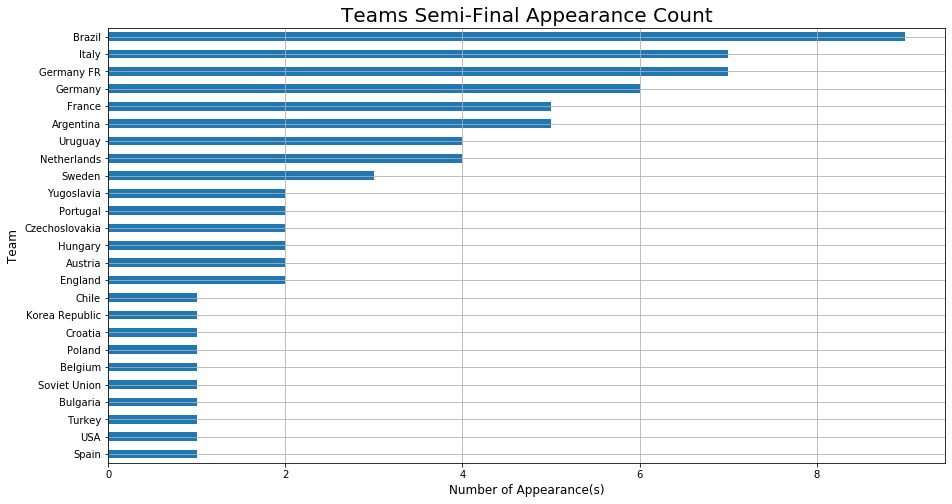

In [10]:
semis = matches[matches['Round'] == 'Semi-finals']
teams_semi = []
for row in semis['HomeTeam']:
    teams_semi.append(row)
for row in semis['AwayTeam']:
    teams_semi.append(row)
    
teams_semi_cnt = {}
for team in teams_semi:
    if team in teams_semi_cnt:
        teams_semi_cnt[team] += 1
    else:
        teams_semi_cnt[team] = 1
semi_teams_cnt = []
for team in teams_semi_cnt:
    semi_teams_cnt.append([team,teams_semi_cnt[team]])
semis_team = pd.DataFrame(semi_teams_cnt)
semis_team.columns = ['Team','Appearance']
semis_team.set_index('Team', inplace = True)


semis_team.sort_values(by = 'Appearance',ascending = True).plot(kind = 'barh', figsize = (15,8), grid = True, legend = False)
plt.title('Teams Semi-Final Appearance Count', fontsize = 20)
plt.ylabel('Team', fontsize = 12)
plt.xlabel('Number of Appearance(s)', fontsize = 12)

## How many goals and average goals scored in all semi-finals

In [11]:
total_semi_goals = semis['goals'].sum()
average_semi_goals = total_semi_goals / semis.shape[0]
print('''The Total number of goals scored in all Semi-Finals is {} goals
      \nAnd the Average number of goals scored in a Semi-Final is {:.2f}'''.format(total_semi_goals,average_semi_goals))

The Total number of goals scored in all Semi-Finals is 131 goals
      
And the Average number of goals scored in a Semi-Final is 3.64


## How many goals and average goals scored in all quarter-finals

In [12]:
quarters = matches[matches['Round'] == 'Quarter-finals']
total_qtr_goals = quarters['goals'].sum()
average_qtr_goals = total_qtr_goals / quarters.shape[0]
print('''The total number of goals scored in all Quarter-Finals is {} goals
      \nAnd the Average goals scored in the Quarter-finals is {:.2f} goals'''.format(total_qtr_goals,average_qtr_goals))

The total number of goals scored in all Quarter-Finals is 180 goals
      
And the Average goals scored in the Quarter-finals is 2.73 goals


## How many goals and average number scored in all finals

In [13]:
total_final_goals = finals['goals'].sum()
average_final_goals = total_final_goals / finals.shape[0]
print('''The total number of goals scored in all Finals is {} goals
      \nAnd the Average goals scored in the Finals is {:.2f} goals'''.format(total_final_goals,average_final_goals))

The total number of goals scored in all Finals is 69 goals
      
And the Average goals scored in the Finals is 3.45 goals


## How many matches were played outside quarter-finals and above

In [14]:
group = ['Quarter-finals','Semi-finals','Match for third place','Play-off for third place','Third place']
No_of_matches = 0
for item in matches['Round']:
    if item in group:
        pass
    else:
        No_of_matches += 1
print('A total of {} matches were played outside quarter-finals and above'.format(No_of_matches))

A total of 731 matches were played outside quarter-finals and above


## Two new columns for each of the outcome of every match stating
* outcome = D for Draw, A for AwayTeam Wins, H for HomeTeam wins.
* Winner of each game: 'Draw' if no winner.

In [15]:
outcome = []
for i,row in matches.iterrows():
    if row[7] == row[8]:
        outcome.append('D')
    elif row[7] > row[8]:
        outcome.append('H')
    else:
        outcome.append('A')
matches['outcome'] = outcome

In [16]:
winner = []
for i, row in matches.iterrows():
    if row[-1] == 'H':
        winner.append(row[6])
    elif row[-1] == 'A':
        winner.append(row[9])
    else:
        winner.append('Draw')
matches['winner'] = winner
matches.head(10)

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,goals,outcome,winner
0,1930,2030-07-13,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,5,H,France
1,1930,2030-07-13,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,3,H,USA
2,1930,2030-07-14,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,3,H,Yugoslavia
3,1930,2030-07-14,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,4,H,Romania
4,1930,2030-07-15,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,1,H,Argentina
5,1930,2030-07-16,14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,3,H,Chile
6,1930,2030-07-17,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,,4,H,Yugoslavia
7,1930,2030-07-17,14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,,3,H,USA
8,1930,2030-07-18,14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,,1,H,Uruguay
9,1930,2030-07-19,12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,,1,H,Chile
